# 1. 네이버뉴스 크롤링 댓글분석

#### 네이버뉴스검색  "부동산매매"  크롤링  태그"class=news_tit" 제목과 링크주소 추출

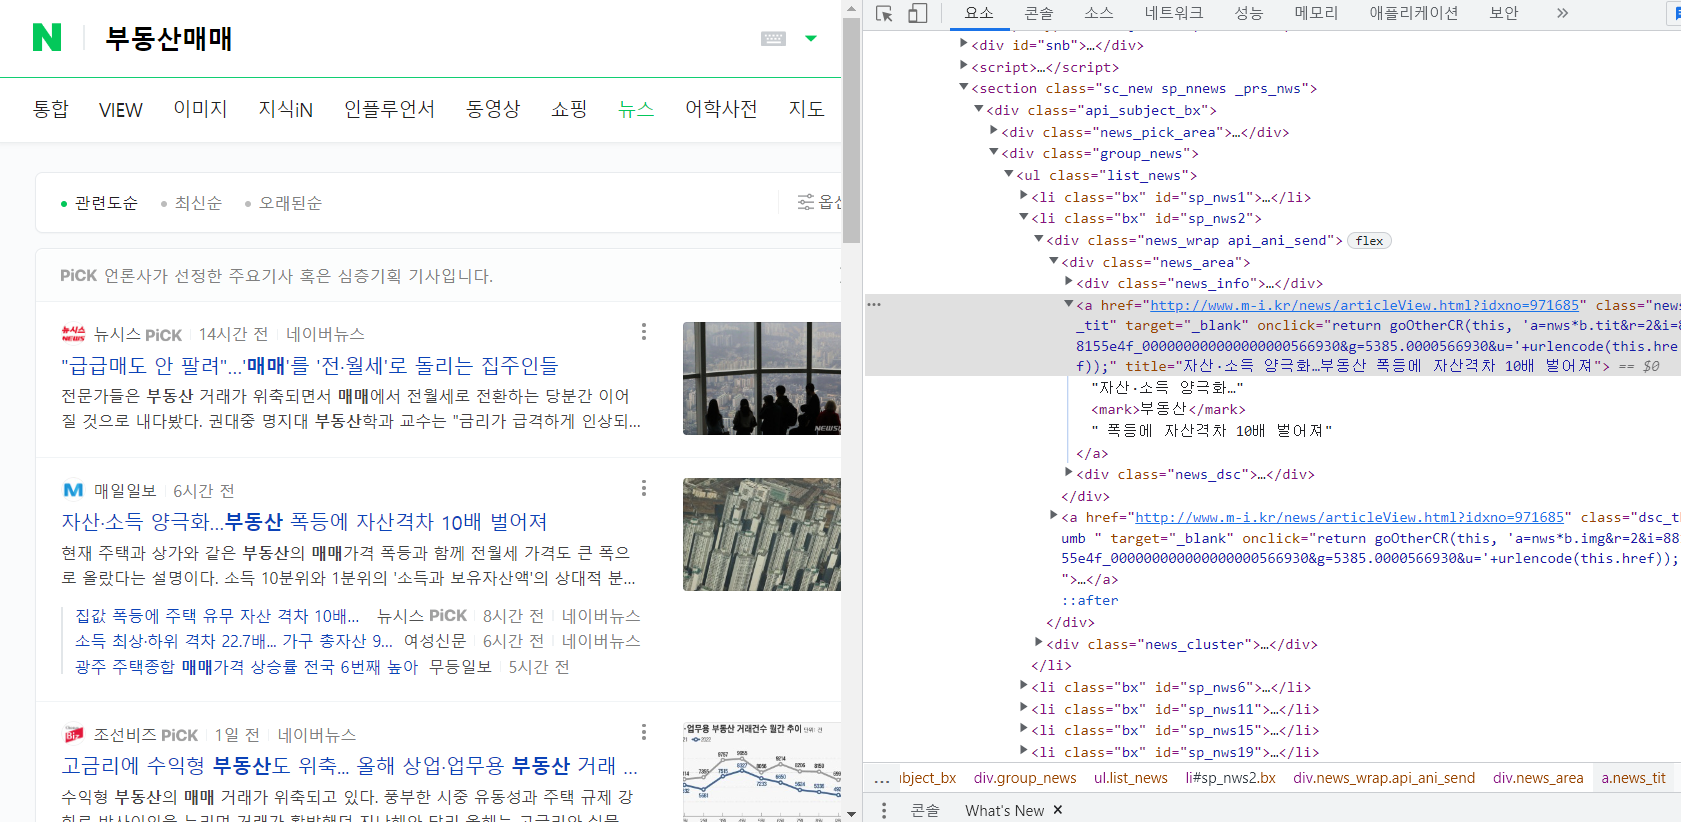

### 네이버뉴스 크롤링 - 제목과 링크주소 추출

In [2]:
from bs4 import BeautifulSoup
import requests
import re
import sys
import pprint
import csv
import json
import pandas as pd

result=[]

headers = {
    'authority': 'apis.naver.com',
    'accept': '*/*',
    'accept-language': 'ko-KR,ko;q=0.9,en-US;q=0.8,en;q=0.7',
    'referer': 'https://n.news.naver.com/article/028/0002595736',
    'sec-ch-ua': '"Whale";v="3", " Not;A Brand";v="99", "Chromium";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-fetch-dest': 'script',
    'sec-fetch-mode': 'no-cors',
    'sec-fetch-site': 'same-site',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.5005.108 Whale/3.15.136.18 Safari/537.36',
}

def news_url(query):
    page =1 
    url_list=[]
    while page <= 151 :

        url = "https://m.search.naver.com/search.naver?where=m_news&sm=tab_pge&query="+query+"&sort=0&photo=0&field=0&pd=1&ds=&de=&cluster_rank=129&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:1w,a:all&start="+str(page)
        response = requests.get(url,headers=headers)
        html = response.text

        #BeautifulSoup 인자값 지정
        soup = BeautifulSoup(html, "lxml")
        # print(soup.select('a.news_tit')[3]['href'])
        #<a>태그에서 제목과 링크주소 추출
        atags = soup.select('.news_tit') 
        # print(len(atags))
        
        for i in atags:
            if "https://n.news.naver.com/" in i['href'] :
                url_list.append(i['href'])   #링크주소
                # print(i['href'])
        if len(atags) < 10 : #한페이지에 10개이며, 그보다 작으면 없다고 판단
            break
        page = page + 10
    return url_list
    # 위에서 크롤링한 네이버 뉴스 url을 입력합니다.

### 뉴스기사 댓글 추출 함수 정의

In [3]:
def comment(url_list):
    total_comment = [] #모든 댓글을 담는 리스트
    for url_ex in url_list:
        url = url_ex
        url = url.split('?')[0]
        oid_1 = url.split('/')[-1]
        oid_2 = url.split('/')[-2]
        i = 1
        # df = pd.DataFrame(columns=['댓글'])

        while True:
            params = {
                'ticket': 'news',
                'templateId': 'default_society',
                'pool': 'cbox5',
                'lang': 'ko',
                'country': 'KR',
                'objectId': f'news{oid_2},{oid_1}',
                'pageSize': '100',
                'indexSize': '10',
                'page': str(i),
                'currentPage': '0',
                'moreParam.direction': 'next',
                'moreParam.prev': '10000o90000op06guicil48ars',
                'moreParam.next': '1000050000305guog893h1re',
                'followSize': '100',
                'includeAllStatus': 'true',
            }

            response = requests.get('https://apis.naver.com/commentBox/cbox/web_naver_list_jsonp.json', params=params, headers=headers)
            response.encoding = "UTF-8-sig"
            res = response.text.replace("_callback(","")[:-2]
            temp=json.loads(res) 
            # print(temp)
            try : 
                comment = list(pd.DataFrame(temp['result']['commentList'])['contents'])
                for j in range(len(comment)):
                    total_comment.append(comment[j])
                if len(comment)<97: 
                    break 
                else: 
                    i+=1
            except :
                break    

    print(total_comment)
    return total_comment

### "부동산매매 " 뉴스 검색어 입력

In [4]:
# # 실행함수
def main():
    query = input("검색어 입력 : ")  
    url_list = news_url(query)  
    allCommetns = comment(url_list)

query = input("검색어 입력 : ")  #부동산매매 
url_list = news_url(query)  
allCommetns = comment(url_list)

검색어 입력 : 부동산매매
['기자야.사기치지마라,.,매매, 전세 넘쳐난다....매매는 7개월째 폭락중이고~~전세물건  넘쳐나고~~~월세도 이제 땡이야~~ ~ 실제 모든거  얼어붙어 수요가 없다', '집주인들이 엄청 착각을 하고 있습니다. 지금 호가가 말도 안되는 거품 가격임을 전혀 깨닫지 못하고 자기 아파트가 무슨 신주단지나 되는 것처럼 말도 안되는 가격을 제시하고 있습니다. 그동안 상식수준을 뛰어넘게 올랐던건 잊어버리셨나 봅니다. 파직카 라는 아파트직거래카페 가보세요. 아파트급매물 쏟아지고 급매만 거래 됩니다. 그간 집값이 재앙 수준인건 확실하네요.', '오늘이  최고가  입니다 ㅠㅠ 4ㅡ5년  쭉하락이다', '기자는 기사를 제대로 썼으면 좋겠다. 어떤게 헐값엔 안팔겠단건지 도저히 이해가 안된다. 흑석동과 본동등 10년이내 아파트는 전세값이 분양가보다 전부다 비싼게 사실이고\n지금 매매금액 자체도 재앙수준으로 높은게 사실이다. 오죽하면 정권이 넘어갔겠는가! 이젠 나라의 미래나 청년세대들을 위해서도 안정화되어가야 하는거다.', '집 매매의 대부분은 투자.투기 때문이었다는', '', '폭락해야한다 계속 50%프로 더더더', '이제는 이런 기사를 그대로 믿는 순진한 국민은 거의 없을걸? 애초에 매매로 내놨다는 건 돈이 급하거나 대출이자가 많아 버티다 버티다 더 이상 못 버틴 경우 매매로 내놓는 건데, 매매에서 전월세로 전환하는 게 마치 헐값에 팔기 싫어서 그런 것처럼 기사를 써놨네. 엄밀히 말해 팔기 싫어서가 아니라 안 팔리니까 어쩔 수 없이 전월세로 돌리는 거지. 그리고 집값이라는 게 자기가 좌지우지 할 수 있는 줄 아냐?  떨어지면 다 떨어지고 오르면 다 오르는 거지. 헐값에 팔기 싫으면 앞으로도 계속 대출이자랑 재산세ㆍ종부세 내면서 가지고 있든가.', '그리 욕심부리다가 몇년후에 똥값되면 팔려고', '"집값 상승의 주범 투기쟁이들.. 매매를 전월세로 전환"', '전세는 잘나가냐? 전세도 쉅지안을텐데~ㅋㅋㅋㅋ', '비싸니.안팔리는거지/ ..', '앞으로 집값

In [5]:
# 분석을 위한 라이브러리삽입
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### "부동산매매_202212. csv" 파일저장

In [6]:
# 만든 리스트 -> 데이터프레임
cols_name = ["reply"]
total_data = pd.DataFrame(allCommetns,columns=cols_name)

csv_file = total_data.to_csv('부동산매매202212.csv',encoding='utf-8-sig')

print(len(total_data))
total_data[:5]

3960


,reply
0,"기자야.사기치지마라,.,매매, 전세 넘쳐난다....매매는 7개월째 폭락중이고~~전세..."
1,집주인들이 엄청 착각을 하고 있습니다. 지금 호가가 말도 안되는 거품 가격임을 전혀...
2,오늘이 최고가 입니다 ㅠㅠ 4ㅡ5년 쭉하락이다
3,기자는 기사를 제대로 썼으면 좋겠다. 어떤게 헐값엔 안팔겠단건지 도저히 이해가 안된...
4,집 매매의 대부분은 투자.투기 때문이었다는


### Counter 클래스 사용해 상위어 빈도 분석하기

In [10]:
from collections import Counter
b= Counter(allCommetns)
print(b)

Counter({'': 543, '아직 멀었다.': 4, '5억이 적당하다': 4, '아직 멀었다': 4, '민주당을 몰살 시켜야 나라가 바로 설것으로\n보임..내가 과해  보이나? 저들이  이끈 5년이\n과해 보인다': 4, '2찍들 좋아죽겠네': 4, '지금사면돈번다 은마는 근데 매물이있을까': 4, '믄죄앙이 개폭등 시킨 거품이 꺼지는중': 4, '더 떨어져라~~~ 지방은 5억이면 40평대 롯데캐슬 산다! 서울 변두리도 오래된 복도식 아파트 20평대가 7~8억이었다. 집이 집이어야지...': 4, '코로나없었다면 일어나지도않았을 일': 4, '처음 살땐 얼마인데': 4, '더 떨어져야정상이고 더 떨어질겁니다.몇년간은 집사는건 바보죠 ㅎ': 4, '19, 20, 21, 22년까지 거의 300만 가까이가 집을 사야하는데 인생최대 혈안이 되어서 정말 광적으로 구매했었죠. 그들을 구제하는 것은 이제 더이상 의미가 없습니다. 나머지 사람들의 세금도 배려도 필요없습니다. 그냥 물 흘러가듯이 내버려둬야 합니다. 모든 투자의 책임은 본인에게 있습니다. 누구도 원망하지 마세요. 😌': 3, '빌라왕이 아니라 부동산 사기범이잖아.   백년호강 짝퉁보수 남괴토구 굥산당 왜국질로 창조경제 실천했다.': 3, '사다죽었네': 3, '빌라 전세사시는분께 일단 명의 이전되게 해드려야함': 3, '부동산R114의 시세조사는 외계인이  한 것인가.뭐 서울이  0.06%밖에 하락하지 않았다고? 한국부동산원과 KB조사는 0.5~0.6%하락이 나오는데 어떻게 그수치의 10분의1밖에 떨어지지 않았다는 시세가 나오나.건설사 앞잡이로 아파트값 하락을 억지로 방어하려고 수치를 조작한 것으로 밖에 볼 수 없다.당국의 제재가 필요한 것 같다.': 3, '아무도 안사니 하락이 정지?기다려바\n\n1년후에도 이런지 ㅋㅋ': 3, '서울에   인간들 꽉꽉   차서    못걸어 다녀야한다  지윽이라고하지': 3, '목동이 왜 저기에 표시된거죠? 양천구인데...': 3, '사지마 이자도 비싸고 가격은 수직으로

In [7]:
from konlpy.tag import Okt
from konlpy.tag import Twitter

In [13]:
twt = Twitter()

In [12]:
convert_string =''.join(b)  # string로 변환
#print(convert_string)
#type(convert_string)

### 형태소분석으로 문장 분해  (단어  : 품사)

In [15]:
tagging = twt.pos(convert_string)

In [16]:
tagging

[('기자', 'Noun'),
 ('야', 'Josa'),
 ('.', 'Punctuation'),
 ('사기치지마라', 'Verb'),
 (',.,', 'Punctuation'),
 ('매매', 'Noun'),
 (',', 'Punctuation'),
 ('전세', 'Noun'),
 ('넘쳐', 'Adjective'),
 ('난다', 'Verb'),
 ('....', 'Punctuation'),
 ('매매', 'Noun'),
 ('는', 'Josa'),
 ('7', 'Number'),
 ('개월', 'Noun'),
 ('째', 'Suffix'),
 ('폭락', 'Noun'),
 ('중', 'Suffix'),
 ('이고', 'Josa'),
 ('~~', 'Punctuation'),
 ('전세', 'Noun'),
 ('물건', 'Noun'),
 ('넘쳐나고', 'Adjective'),
 ('~~~', 'Punctuation'),
 ('월세', 'Noun'),
 ('도', 'Josa'),
 ('이제', 'Noun'),
 ('땡', 'Noun'),
 ('이야', 'Josa'),
 ('~~', 'Punctuation'),
 ('~', 'Punctuation'),
 ('실제', 'Noun'),
 ('모든', 'Modifier'),
 ('거', 'Noun'),
 ('얼어붙어', 'Verb'),
 ('수요', 'Noun'),
 ('가', 'Josa'),
 ('없다', 'Adjective'),
 ('집주인', 'Noun'),
 ('들', 'Suffix'),
 ('이', 'Josa'),
 ('엄청', 'Adverb'),
 ('착각', 'Noun'),
 ('을', 'Josa'),
 ('하고', 'Verb'),
 ('있습니다', 'Adjective'),
 ('.', 'Punctuation'),
 ('지금', 'Noun'),
 ('호가', 'Noun'),
 ('가', 'Josa'),
 ('말', 'Noun'),
 ('도', 'Josa'),
 ('안되는', 'Adjective'),


In [17]:
c= Counter(tagging)
print(c)

Counter({('.', 'Punctuation'): 1397, ('이', 'Josa'): 894, ('가', 'Josa'): 629, ('들', 'Suffix'): 588, ('에', 'Josa'): 514, ('은', 'Josa'): 483, ('?', 'Punctuation'): 473, ('도', 'Josa'): 416, ('을', 'Josa'): 408, ('는', 'Josa'): 386, ('\n', 'Foreign'): 360, (',', 'Punctuation'): 339, ('아파트', 'Noun'): 289, ('으로', 'Josa'): 288, ('..', 'Punctuation'): 274, ('집값', 'Noun'): 259, ('부동산', 'Noun'): 252, ('더', 'Noun'): 226, ('의', 'Josa'): 223, ('로', 'Josa'): 212, ('...', 'Punctuation'): 211, ('를', 'Josa'): 204, ('가격', 'Noun'): 169, ('집', 'Noun'): 166, ('만', 'Josa'): 163, ('다', 'Adverb'): 163, ('사람', 'Noun'): 152, ('투기', 'Noun'): 148, ('고', 'Josa'): 142, ('!', 'Punctuation'): 137, ('18억', 'Number'): 134, ('이다', 'Josa'): 126, ('~', 'Punctuation'): 124, ('돈', 'Noun'): 122, ('때', 'Noun'): 121, ('적', 'Suffix'): 121, ('것', 'Noun'): 120, ('에서', 'Josa'): 120, ('안', 'VerbPrefix'): 118, ('지금', 'Noun'): 117, ('분양', 'Noun'): 110, ('정상', 'Noun'): 109, ('말', 'Noun'): 108, ('금리', 'Noun'): 108, ('하고', 'Josa'): 106, ('

### 명사 상위50개 추출

In [18]:
okt = Okt()
noun = okt.nouns(convert_string)
count = Counter(noun)

noun_list = count.most_common(50)
for v in noun_list:
    print(v)

('아파트', 289)
('집값', 259)
('부동산', 252)
('더', 226)
('가격', 169)
('집', 166)
('사람', 152)
('투기', 148)
('돈', 122)
('때', 121)
('것', 120)
('지금', 117)
('분양', 110)
('정상', 109)
('말', 108)
('금리', 108)
('이', 100)
('하락', 99)
('거품', 97)
('주택', 91)
('이제', 84)
('정부', 84)
('서울', 82)
('전세', 77)
('규제', 77)
('평', 76)
('기사', 75)
('결혼', 74)
('뭐', 69)
('거', 67)
('좀', 67)
('나라', 64)
('국민', 64)
('대출', 64)
('생각', 63)
('왜', 62)
('문재인', 62)
('강남', 61)
('시작', 60)
('재앙', 58)
('내년', 58)
('문제', 57)
('그', 57)
('값', 55)
('때문', 54)
('세금', 54)
('거래', 53)
('정권', 52)
('건설', 50)
('앞', 48)


In [19]:
import nltk
from nltk.stem.porter import PorterStemmer  
from nltk.tokenize import RegexpTokenizer 
from nltk.corpus import stopwords 

In [20]:
#정규표현식 [\w]+에 해당하는 내용으로 tokenize 실행

tokenizer = RegexpTokenizer('[\w]+')

In [21]:
stop_words = stopwords.words('english')  #집계제외 단어

In [22]:
tokens = tokenizer.tokenize(convert_string)

In [24]:
stopped_tokens2 = [i for i in stopped_tokens if len(i)>1] #빈칸제거 1보다 작으면 제거 뜻

In [25]:
stopped_tokens2

['기자야',
 '사기치지마라',
 '매매',
 '전세',
 '넘쳐난다',
 '매매는',
 '7개월째',
 '폭락중이고',
 '전세물건',
 '넘쳐나고',
 '월세도',
 '이제',
 '땡이야',
 '실제',
 '모든거',
 '얼어붙어',
 '수요가',
 '없다집주인들이',
 '엄청',
 '착각을',
 '하고',
 '있습니다',
 '지금',
 '호가가',
 '말도',
 '안되는',
 '거품',
 '가격임을',
 '전혀',
 '깨닫지',
 '못하고',
 '자기',
 '아파트가',
 '무슨',
 '신주단지나',
 '되는',
 '것처럼',
 '말도',
 '안되는',
 '가격을',
 '제시하고',
 '있습니다',
 '그동안',
 '상식수준을',
 '뛰어넘게',
 '올랐던건',
 '잊어버리셨나',
 '봅니다',
 '파직카',
 '라는',
 '아파트직거래카페',
 '가보세요',
 '아파트급매물',
 '쏟아지고',
 '급매만',
 '거래',
 '됩니다',
 '그간',
 '집값이',
 '재앙',
 '수준인건',
 '확실하네요',
 '오늘이',
 '최고가',
 '입니다',
 'ㅠㅠ',
 '4ㅡ5년',
 '쭉하락이다기자는',
 '기사를',
 '제대로',
 '썼으면',
 '좋겠다',
 '어떤게',
 '헐값엔',
 '안팔겠단건지',
 '도저히',
 '이해가',
 '안된다',
 '흑석동과',
 '본동등',
 '10년이내',
 '아파트는',
 '전세값이',
 '분양가보다',
 '전부다',
 '비싼게',
 '사실이고',
 '지금',
 '매매금액',
 '자체도',
 '재앙수준으로',
 '높은게',
 '사실이다',
 '오죽하면',
 '정권이',
 '넘어갔겠는가',
 '이젠',
 '나라의',
 '미래나',
 '청년세대들을',
 '위해서도',
 '안정화되어가야',
 '하는거다',
 '매매의',
 '대부분은',
 '투자',
 '투기',
 '때문이었다는폭락해야한다',
 '계속',
 '50',
 '프로',
 '더더더이제는',
 '이런',
 '기사를',
 '그대로',
 '믿는',
 '순진한',
 '국

In [26]:
pd.Series(stopped_tokens2).value_counts().head(10)

부동산     119
집값      102
아파트      78
아직       67
이제       64
지금       59
아직도      53
18억      50
떨어져야     47
집값이      47
dtype: int64

### 그래프 시각화 표현

In [28]:
ko = nltk.Text(stopped_tokens2)

In [29]:
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 
    
%matplotlib inline

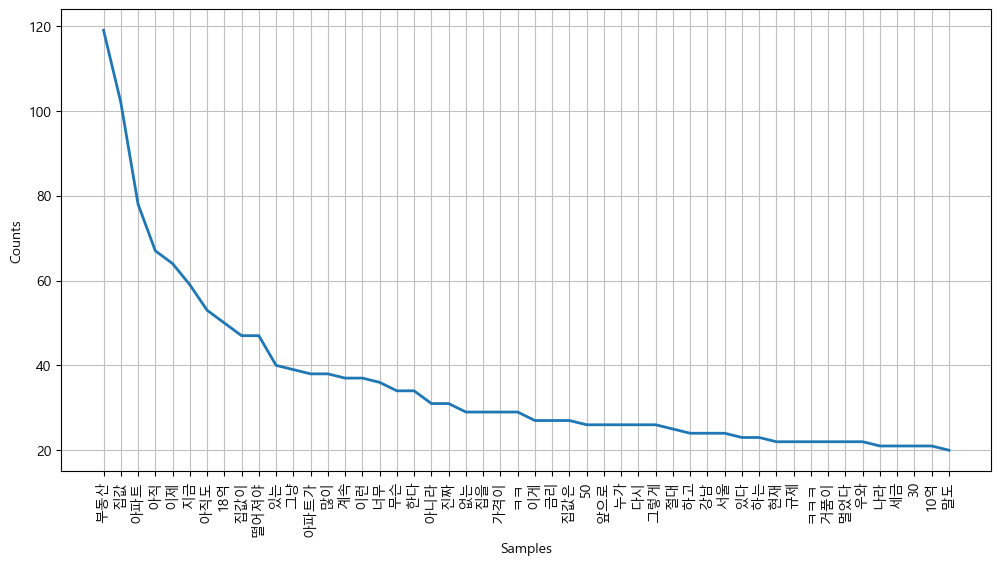

In [30]:
plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()

### 불용어 제거

In [35]:
stop_words = ['야','도','이런','이게','위','하는','말','50','로','재앙','ㅋㅋ','ㅋㅋㅋ','더','씨','것','날','등','때','나라','위해','우와','더','건','이번']

ko = [each_word for each_word in ko if each_word not in stop_words]
ko[1]

'사기치지마라'

### 불용어 제거 후 그래프 표현

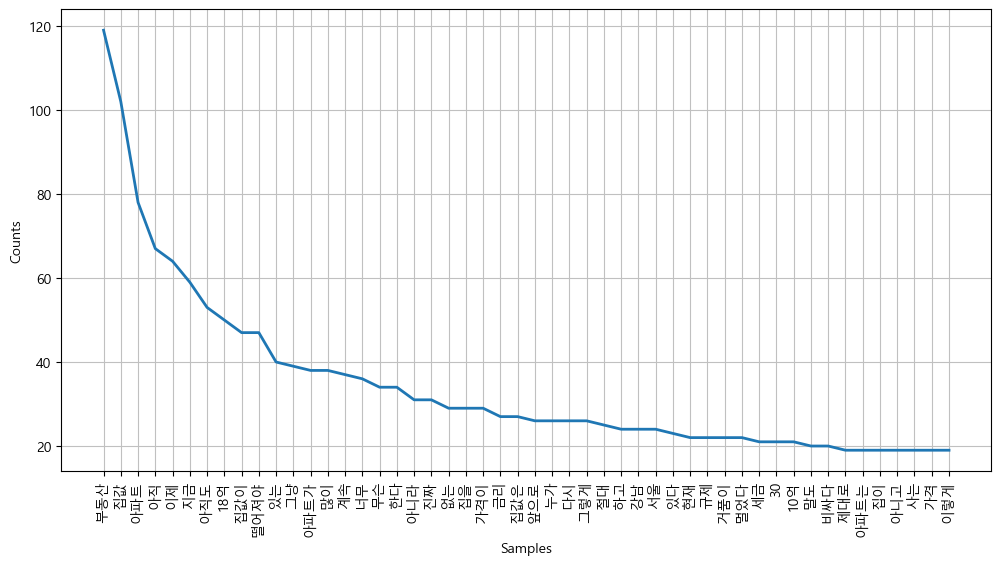

In [36]:
ko = nltk.Text(ko)

plt.figure(figsize=(12,6))
ko.plot(50)     # Plot sorted frequency of top 50 tokens
plt.show()

### 워드클라우드 표현

In [39]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

In [40]:
font_path = 'NanumBarunGothic.ttf'

wordcloud = WordCloud(
    font_path = font_path,
    width = 600,
    height = 600,
    background_color="white"
)

In [41]:
count = Counter(ko)
wordcloud = wordcloud.generate_from_frequencies(count)
get_ipython().run_line_magic('matplotlib','inline')

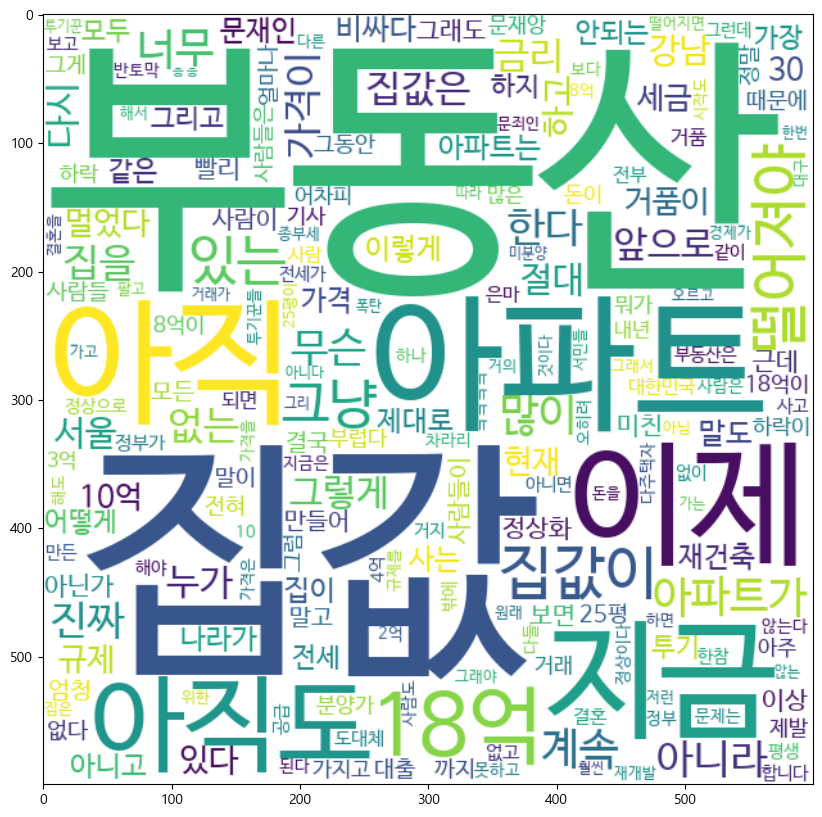

In [42]:
flg = plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()   

### <결론> 
#### "부동산매매" 뉴스검색 댓글 분석 결과 
#### 부동산 > 집값 > 아파트 > 이제  > 아직 > 떨어져야  순서로 나타나는 것을 확인 할 수 있습니다.